In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
np.random.seed(707)

In [2]:
data = pd.read_csv('./diabetes.csv');

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.drop(['SkinThickness','Insulin','Pregnancies'],axis=1,inplace=True);

In [5]:
data.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,33.6,0.627,50,1
1,85,66,26.6,0.351,31,0
2,183,64,23.3,0.672,32,1
3,89,66,28.1,0.167,21,0
4,137,40,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   BMI                       768 non-null    float64
 3   DiabetesPedigreeFunction  768 non-null    float64
 4   Age                       768 non-null    int64  
 5   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 36.1 KB


Missing Values are represented as zeroes in the datasets

In [7]:
print('The number of missing values in Glucose are : ',data[data['Glucose'] == 0].count()[1])
print('The number of missing values in BloodPressure are : ',data[data['BloodPressure'] == 0].count()[1])
print('The number of missing values in BMI are : ',data[data['BMI'] == 0].count()[1])
print('The number of missing values in DiabetesPedigreeFunction are : ',data[data['DiabetesPedigreeFunction'] == 0].count()[1])
print('The number of missing values in Age are : ',data[data['Age'] == 0].count()[1])

The number of missing values in Glucose are :  5
The number of missing values in BloodPressure are :  35
The number of missing values in BMI are :  11
The number of missing values in DiabetesPedigreeFunction are :  0
The number of missing values in Age are :  0


In [8]:
data[['Glucose','BloodPressure','BMI']] = data[['Glucose','BloodPressure','BMI']].replace(to_replace=0,value=np.nan)

In [9]:
data['Glucose'] = data['Glucose'].replace(to_replace=np.nan,value=data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(to_replace=np.nan,value=data['BloodPressure'].mean())
data['BMI'] = data['BMI'].replace(to_replace=np.nan,value=data['BMI'].mean())

In [10]:
data.isna().sum().all

<bound method NDFrame._add_numeric_operations.<locals>.all of Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64>

In [11]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train =std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

/Users/elmintrix/opt/anaconda3/envs/graudation_project/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/Users/elmintrix/opt/anaconda3/envs/graudation_project/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/Users/elmintrix/opt/anaconda3/envs/graudation_project/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/Users/elmintrix/opt/anaconda3/envs/graudation_project/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio 

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

Best parameter was {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

 ROC Curve


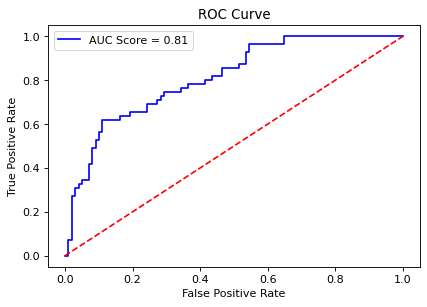

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params={'penalty':('l1','l2','elasticnet','none'),
        'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
        'C':[0.1, 1, 10, 100, 1000]}

lr = LogisticRegression(max_iter=1000,random_state=42)
clf = GridSearchCV(lr,params)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

from sklearn.metrics import classification_report,auc,roc_curve
accuracy_score = classification_report(y_test,y_pred)
print(accuracy_score)
print('Best parameter was',clf.best_params_)

print("\n","ROC Curve")
clf_prob=clf.predict_proba(x_test)
clf_prob1=clf_prob[:,1]
fpr,tpr,thresh=roc_curve(y_test,clf_prob1)
roc_auc_knn=auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        99
           1       0.71      0.71      0.71        55

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154

{'criterion': 'gini'}

 ROC Curve


/Users/elmintrix/opt/anaconda3/envs/graudation_project/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.


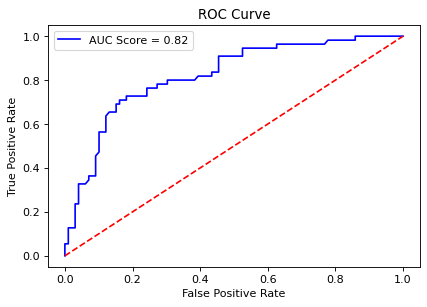

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {'criterion':('gini','entropy')}

rf = RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)
clf = GridSearchCV(rf,params)

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

from sklearn.metrics import classification_report,auc,roc_curve
accuracy_score = classification_report(y_test,y_pred)
print(accuracy_score)
print(clf.best_params_)

print("\n","ROC Curve")
clf_prob=clf.predict_proba(x_test)
clf_prob1=clf_prob[:,1]
fpr,tpr,thresh=roc_curve(y_test,clf_prob1)
roc_auc_knn=auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()
plt.show()

In [18]:
# exporting the model as pkl
joblib.dump(clf,'model.pkl')

['model.pkl']

In [17]:
# exporting the columns
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']